In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter

In [ ]:
df_csv = pd.read_csv("travel insurance.csv",sep=",")
df_csv.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [ ]:
df_csv.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
num_cols = df_csv._get_numeric_data().columns
con_var = []
for i in num_cols:
  if(len(df_csv[i].unique())) > int(df_csv.shape[0]/130):
     con_var.append(i)
print('Continuous Variables : ',con_var)
print('\n')
cat_var1=list(set(df_csv.columns) - set(con_var))
for i in cat_var1:
  print('Categorical Variable :',i, "\t", len(df_csv[i].unique())) 

Continuous Variables :  ['Net Sales', 'Commision (in value)']


Categorical Variable : Destination 	 149
Categorical Variable : Claim 	 2
Categorical Variable : Age 	 89
Categorical Variable : Product Name 	 26
Categorical Variable : Agency 	 16
Categorical Variable : Gender 	 3
Categorical Variable : Distribution Channel 	 2
Categorical Variable : Agency Type 	 2
Categorical Variable : Duration 	 455


In [ ]:
df_new = df_csv.copy()
df_new['Gender'].fillna("X", inplace = True) 
df_new['Gender']

0        F
1        F
2        X
3        X
4        X
        ..
63321    M
63322    F
63323    M
63324    M
63325    F
Name: Gender, Length: 63326, dtype: object

In [ ]:
a=list(df_new['Destination'].unique())
aa=list(df_new['Agency'].unique())

In [ ]:
df_new = df_new[df_new.Age != 118]
df_new = df_new[df_new.Duration >=0]
print("Now the dataset  has {} Rows and {} Columns".format(df_new.shape[0],df_new.shape[1]))
print("%d records deleted from the dataset"%(df_csv.shape[0]-df_new.shape[0]))
df_new=df_new.reset_index().drop(columns='index')
df1 = df_new.copy()

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [ ]:
b=list(df_new['Destination'].unique())
bb=list(df_new['Agency'].unique())

In [ ]:
new=[]
for i in a :
  if(i not in list(b)):
    print(i)
    new.append(i)
for i in aa:
  if(i not in list(bb)):
    print(i)
    new.append(i)

KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF
TIBET
JWT


In [ ]:
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_new.columns)-set(df_new._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_new[i])
for j in list(df_new._get_numeric_data().columns):
  le_df[j]=df_new[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [ ]:
relation=dict()
for l in list(set(df_new.columns)-set(df_new._get_numeric_data().columns)):
  indx=[]
  for x in df_new[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_new.index[df_new[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_new.loc[indx][l].to_list()))
  relation[l]=dic
  print(dic)

{78: 'MALAYSIA', 4: 'AUSTRALIA', 61: 'ITALY', 138: 'UNITED STATES', 128: 'THAILAND', 95: 'NORWAY', 143: 'VIET NAM', 32: 'DENMARK', 117: 'SINGAPORE', 63: 'JAPAN', 137: 'UNITED KINGDOM', 57: 'INDONESIA', 56: 'INDIA', 26: 'CHINA', 41: 'FRANCE', 125: 'TAIWAN, PROVINCE OF CHINA', 101: 'PHILIPPINES', 87: 'MYANMAR', 53: 'HONG KONG', 67: 'KOREA, REPUBLIC OF', 136: 'UNITED ARAB EMIRATES', 88: 'NAMIBIA', 92: 'NEW ZEALAND', 28: 'COSTA RICA', 19: 'BRUNEI DARUSSALAM', 102: 'POLAND', 121: 'SPAIN', 31: 'CZECH REPUBLIC', 44: 'GERMANY', 122: 'SRI LANKA', 21: 'CAMBODIA', 5: 'AUSTRIA', 120: 'SOUTH AFRICA', 127: 'TANZANIA, UNITED REPUBLIC OF', 70: "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 89: 'NEPAL', 90: 'NETHERLANDS', 76: 'MACAO', 29: 'CROATIA', 40: 'FINLAND', 23: 'CANADA', 130: 'TUNISIA', 109: 'RUSSIAN FEDERATION', 46: 'GREECE', 11: 'BELGIUM', 59: 'IRELAND', 124: 'SWITZERLAND', 25: 'CHILE', 60: 'ISRAEL', 8: 'BANGLADESH', 55: 'ICELAND', 103: 'PORTUGAL', 108: 'ROMANIA', 66: 'KENYA', 43: 'GEORGIA', 131: 'TURKEY

In [ ]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_new.copy()
for i in list(set(df_new.columns)-set(df_new._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

One Hot Encoded dataset  has 62342 Rows and 199 Columns


In [ ]:
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [ ]:
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_test.shape[0])*100,"%")

In [ ]:
def balance(X_train,y_train,typ):
  if(typ.lower() == 'ros'):
    rus=RandomOverSampler(random_state=70)
    x_res, y_res = rus.fit_sample(X_train, y_train)
    print('Dataset shape after Random Over Sampling :', Counter(y_res))
    print('After ROS the number of Rows Training set now are :', x_res.shape[0])
  elif(typ.lower() == 'rus' ):
    ros=RandomUnderSampler(random_state=70)
    x_res, y_res = ros.fit_sample(X_train, y_train)
    print('Dataset shape after Random Under Sampling :', Counter(y_res))
    print('After RUS the number of Rows Training set now are :', x_res.shape[0])
  elif(typ.lower() == 'smote tomek' ):
    sm = SMOTE(random_state=70, sampling_strategy=0.1, n_jobs=-1)  # ratio={'1':10000, '0':171044}
    x_sm, y_sm = sm.fit_sample(X_train, y_train)
    tl = TomekLinks(random_state=42)
    x_res, y_res = tl.fit_sample(x_sm, y_sm)
    print('Resampled dataset shape after Smote + Tomeklinks :', Counter(y_res))
    print('After Smote + Tomeklinks the number of Rows Training set now are :', x_res.shape[0])
  elif(typ.lower() == 'adasyn' ):
    # ADASYN
    ada = ADASYN(random_state=70, sampling_strategy=0.1, n_jobs=-1)
    x_res, y_res = ada.fit_sample(X_train, y_train)
    print('Resampled dataset shape after Adasyn :', Counter(y_res))
    print('After Adasyn the number of Rows Training set now are :', x_res.shape[0]) 
  return x_res, y_res

In [ ]:
def scatter_plot(dum_sample):
  plt.figure(figsize=(12, 12))
  sns.scatterplot(x='component1' , y='component2', hue='label', data =dum_sample)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df_target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

# **XGBoost Classifier Analysis(One Hot Encoding):-**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,df_target,test_size = 0.25, random_state = 70, stratify = df_target)
print_input(X_train, X_test, y_train, y_test)

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %


**Without HyperParameter Tunning:-**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


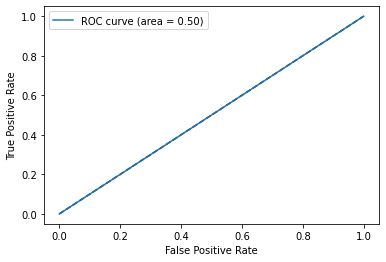

In [ ]:
#No Sampling
xgb = XGBClassifier(random_state=70)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[1 1 0 ... 0 1 1]
Confusion Matrix       : 
 [[12007  3350]
 [   59   170]]
Accuracy of Model      :  0.781278070062877
Precision of Model     :  0.048295454545454544
Recall of Model        :  0.74235807860262
F1 Score of Model      :  0.09069085089357161
ROC_AUC score of Model :  0.7621082572475234


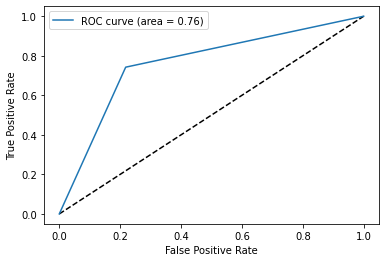

In [ ]:
#Random UnderSampling
xgb.fit(X_u_train, y_u_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[1 1 0 ... 0 1 1]
Confusion Matrix       : 
 [[12349  3008]
 [   64   165]]
Accuracy of Model      :  0.8029000384960863
Precision of Model     :  0.05200126063662149
Recall of Model        :  0.7205240174672489
F1 Score of Model      :  0.09700176366843033
ROC_AUC score of Model :  0.7623262139820454


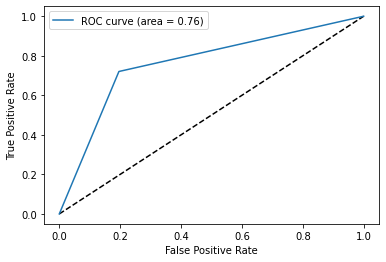

In [ ]:
#Random OverSampling
xgb.fit(X_o_train, y_o_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


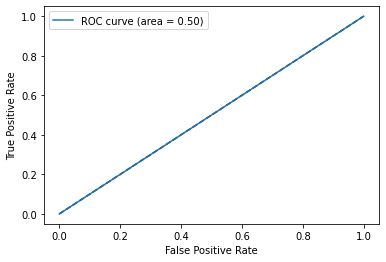

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 1.0
xgb.fit(X_s_train, y_s_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


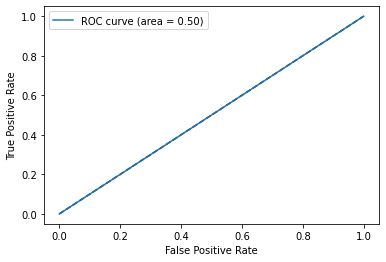

In [ ]:
#Adasyn With Sampling_Strategy 1.0
xgb.fit(X_a_train, y_a_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


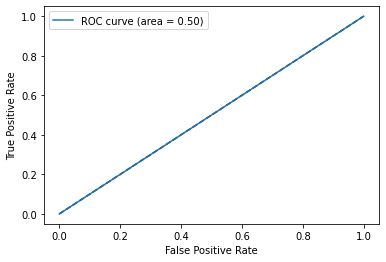

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 0.8
xgb.fit(X_s_train, y_s_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


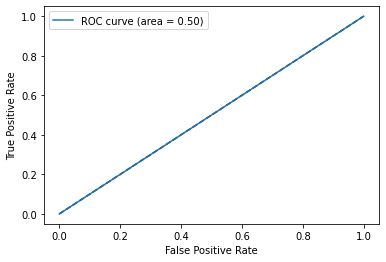

In [ ]:
#Adasyn With Sampling_Strategy 0.8
xgb.fit(X_a_train, y_a_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


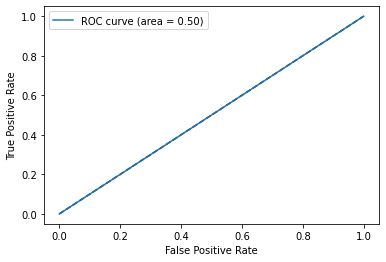

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 0.3
xgb.fit(X_s_train, y_s_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


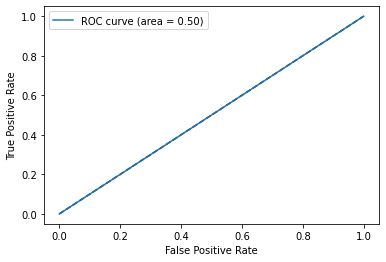

In [ ]:
#Adasyn With Sampling_Strategy 0.3
xgb.fit(X_a_train, y_a_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


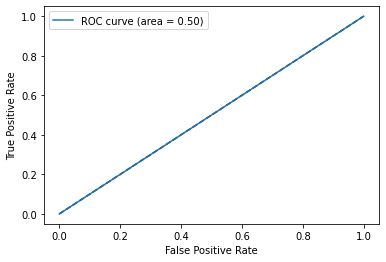

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 0.1
xgb.fit(X_s_train, y_s_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


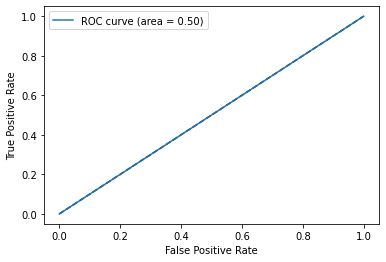

In [ ]:
#Adasyn With Sampling_Strategy 0.1
xgb.fit(X_a_train, y_a_train)
y_pred = xgb.predict(X_test.values)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

**Hyperparameter Tunning(GridSearchCV):-**

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   10.9s remaining:   43.6s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   20.3s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


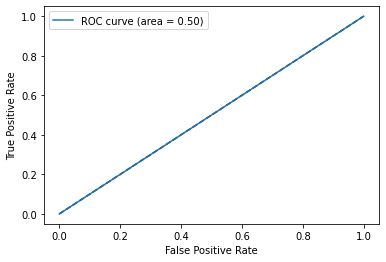

In [ ]:
#No Sampling
xgb = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
param_grid={   'nthread':[4],
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
            }

xgb_reg=GridSearchCV(estimator=xgb,param_grid=param_grid,scoring = 'roc_auc',n_jobs = 10,cv = 10,verbose=True)
xgb_reg.fit(X_train, y_train.values.ravel())
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

Dataset shape after Random Under Sampling : Counter({0: 688, 1: 688})
After RUS the number of Rows Training set now are : 1376
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[12521  2836]
 [   71   158]]
Accuracy of Model      :  0.8134864622096754
Precision of Model     :  0.052772211088844355
Recall of Model        :  0.6899563318777293
F1 Score of Model      :  0.09804529941048713
ROC_AUC score of Model :  0.7526424232807934


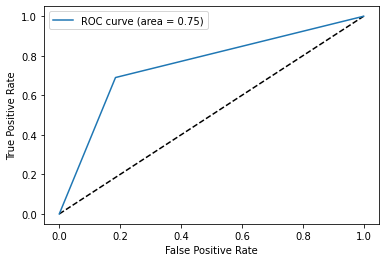

In [ ]:
#Random UnderSampling
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_u_train, y_u_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred)

Dataset shape after Random Over Sampling : Counter({0: 46068, 1: 46068})
After ROS the number of Rows Training set now are : 92136
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[12936  2421]
 [   73   156]]
Accuracy of Model      :  0.8399846015655075
Precision of Model     :  0.06053550640279395
Recall of Model        :  0.6812227074235808
F1 Score of Model      :  0.11119030648610123
ROC_AUC score of Model :  0.761787364651427


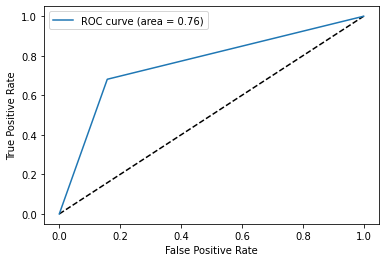

In [ ]:
#Random OverSampling
X_o_train, y_o_train = balance(X_train, y_train.values.ravel(),'ros')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_o_train, y_o_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred)

Resampled dataset shape after Smote + Tomeklinks : Counter({0: 46068, 1: 45910})
After Smote + Tomeklinks the number of Rows Training set now are : 91978
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[14141  1216]
 [  118   111]]
Accuracy of Model      :  0.914410368279225
Precision of Model     :  0.08364732479276564
Recall of Model        :  0.4847161572052402
F1 Score of Model      :  0.14267352185089976
ROC_AUC score of Model :  0.7027670126392157


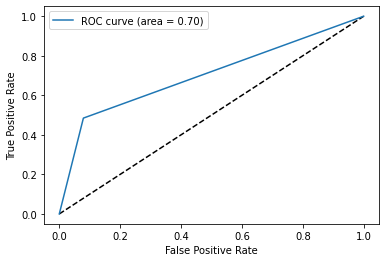

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 1.0
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote tomek')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_s_train, y_s_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred)
#predictions = my_model.predict(test_data_process.values) 

Resampled dataset shape after Adasyn : Counter({0: 46068, 1: 45796})
After Adasyn the number of Rows Training set now are : 91864
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[13915  1442]
 [  102   127]]
Accuracy of Model      :  0.9009367380982933
Precision of Model     :  0.08094327597195666
Recall of Model        :  0.5545851528384279
F1 Score of Model      :  0.14126807563959956
ROC_AUC score of Model :  0.7303433024724797


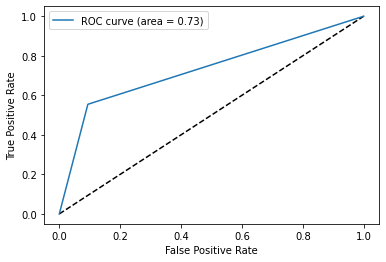

In [ ]:
#Adasyn With Sampling_Strategy 1.0
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_a_train, y_a_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred) 

Resampled dataset shape after Smote + Tomeklinks : Counter({0: 45876, 1: 36854})
After Smote + Tomeklinks the number of Rows Training set now are : 82730
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[14369   988]
 [  135    94]]
Accuracy of Model      :  0.9279481586038753
Precision of Model     :  0.08687615526802218
Recall of Model        :  0.4104803493449782
F1 Score of Model      :  0.14340198321891687
ROC_AUC score of Model :  0.6730724335772231


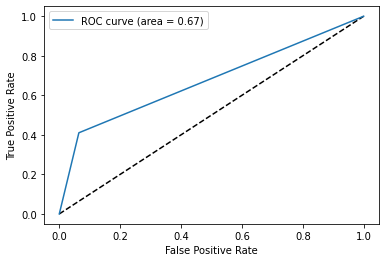

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 0.8
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote tomek')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_s_train, y_s_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred)
#predictions = my_model.predict(test_data_process.values) 

Resampled dataset shape after Adasyn : Counter({0: 46068, 1: 36815})
After Adasyn the number of Rows Training set now are : 82883
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[14093  1264]
 [  113   116]]
Accuracy of Model      :  0.9116514820993199
Precision of Model     :  0.08405797101449275
Recall of Model        :  0.5065502183406113
F1 Score of Model      :  0.14418893722809198
ROC_AUC score of Model :  0.7121212379715037


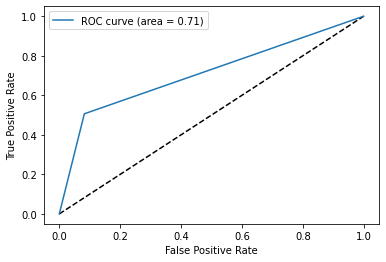

In [ ]:
#Adasyn With Sampling_Strategy 0.8
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_a_train, y_a_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred) 

Resampled dataset shape after Smote + Tomeklinks : Counter({0: 45689, 1: 13820})
After Smote + Tomeklinks the number of Rows Training set now are : 59509
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[15026   331]
 [  185    44]]
Accuracy of Model      :  0.9668933658411395
Precision of Model     :  0.11733333333333333
Recall of Model        :  0.19213973799126638
F1 Score of Model      :  0.1456953642384106
ROC_AUC score of Model :  0.585293024559871


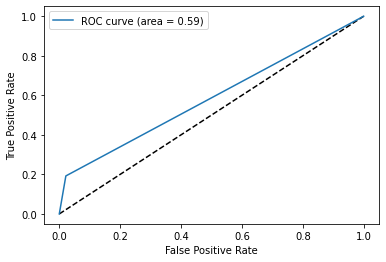

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 0.3
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote tomek')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_s_train, y_s_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred)
#predictions = my_model.predict(test_data_process.values) 

Resampled dataset shape after Adasyn : Counter({0: 46068, 1: 13576})
After Adasyn the number of Rows Training set now are : 59644
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[14997   360]
 [  181    48]]
Accuracy of Model      :  0.9652893622481714
Precision of Model     :  0.11764705882352941
Recall of Model        :  0.2096069868995633
F1 Score of Model      :  0.15070643642072215
ROC_AUC score of Model :  0.5930824541843002


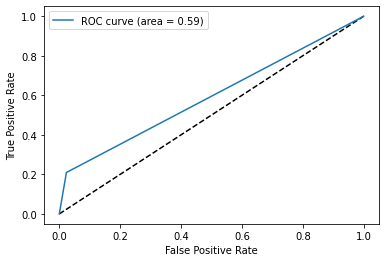

In [ ]:
#Adasyn With Sampling_Strategy 0.3
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_a_train, y_a_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred) 

Resampled dataset shape after Smote + Tomeklinks : Counter({0: 45703, 1: 4606})
After Smote + Tomeklinks the number of Rows Training set now are : 50309
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[15288    69]
 [  218    11]]
Accuracy of Model      :  0.9815860387527268
Precision of Model     :  0.1375
Recall of Model        :  0.048034934497816595
F1 Score of Model      :  0.07119741100323625
ROC_AUC score of Model :  0.5217709347230244


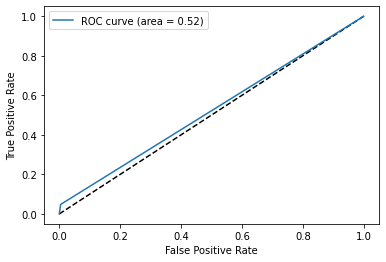

In [ ]:
#SMOTE + TomekLinks With Sampling_Strategy 0.1
X_s_train, y_s_train = balance(X_train, y_train.values.ravel(),'smote tomek')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_s_train, y_s_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred)
#predictions = my_model.predict(test_data_process.values) 

Resampled dataset shape after Adasyn : Counter({0: 46068, 1: 4595})
After Adasyn the number of Rows Training set now are : 50663
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, n_estimators=5, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)
Confusion Matrix       : 
 [[15349     8]
 [  229     0]]
Accuracy of Model      :  0.9847940459386629
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.4997395324607671


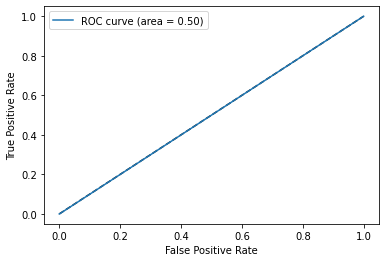

In [ ]:
#Adasyn With Sampling_Strategy 0.1
X_a_train, y_a_train = balance(X_train, y_train.values.ravel(),'adasyn')
xgb_reg=GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 3)
xgb_reg.fit(X_a_train, y_a_train)
xgb_reg_best_dt = xgb_reg.best_estimator_
print(xgb_reg_best_dt)
y_pred = xgb_reg_best_dt.predict(X_test.values)
print_result(y_test=y_test,y_pred=y_pred) 